전이학습, transfer learning

- 이미 학습한 정보를 가져와 내 프로젝트에 활용하는 것
- 방대한 자료를 통해 미리 학습한 가중치 값을 가져와 내 프로젝트에 사용하는 방법

Deep-learning을 이용한 project

*어떤 data를 가지고 있는지*<br />
*어떤 목적을 가지고 있는지*

를 잘 살펴보는 것부터가 시작.

<pre>
train_datagen = ImageDataGenerator(
  rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,
  rotation_range=5, shear_range=0.7, zoom_range=1.2, vertical_flip=True,
  fill_mode="nearest")
</pre>

- rescale: pixel 범위 바꾸기 (배수로 추정됨)
- horizontal_flip, vertical_flip: 수평, 수직 뒤집기
- zoom_range: 정해진 범위 안에서 축소 또는 확대
- width_shift, height_shift: 정해진 범위 안에서 그림을 수평 또는 수직으로 랜덤하게 평행 이동
- rotation_range: 정해진 각도만큼 회전
- shear_range: 좌표 하나를 고정시키고 다른 몇 개의 좌표를 이동시키는 변환
- fill_mode: 변환시킬 때 생기는 빈 공간을 어떻게 채울지 결정하는 옵션

<br />

모든 옵션을 사용하기보다 주어진 데이터의 특징을 파악해 적당히 사용하는 것이 좋다
- 모든 옵션을 이용하면 학습 시간이 너무 늘어남.

<br />

test data는 실제와 유사해야 하므로 대체로 데이터 증강을 하지 않는 것이 좋다.

In [22]:
import numpy as np
import tensorflow as tf

# preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

from tensorflow.keras import initializers, regularizers, optimizers, metrics

# visualization
import matplotlib.pyplot as plt

### data

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255, horizontal_flip=True,
    width_shift_range=0.1, height_shift_range=0.1, fill_mode="nearest")

In [5]:
train_generator = train_datagen.flow_from_directory(
  "train", target_size=(150, 150), batch_size=5, class_mode="binary")

Found 160 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "test", target_size=(150, 150), batch_size=5, class_mode="binary")

Found 120 images belonging to 2 classes.


## 데이터 증강을 통해 적은 데이터셋 학습

In [3]:
np.random.seed(3)
tf.random.set_seed(3)

### model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(150, 150, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [9]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.0002),
    metrics=["accuracy"])

- step_per_epoch: 한 번 epoch를 볼 때 몇 번 볼 것인가.
- validation_steps: 한 번 epoch 이후에 validation data set를 고려할 때 몇 번 볼 것인가.

In [19]:
history = model.fit_generator(
    train_generator, validation_data=test_generator, validation_steps=10,
    epochs=40, steps_per_epoch=30)

Epoch 1/40
30/30 [==============================] - 3s 106ms/step - loss: 0.5455 - accuracy: 0.7267 - val_loss: 0.4632 - val_accuracy: 0.8200
Epoch 2/40
30/30 [==============================] - 3s 99ms/step - loss: 0.4244 - accuracy: 0.8600 - val_loss: 0.4378 - val_accuracy: 0.8000
Epoch 3/40
30/30 [==============================] - 3s 99ms/step - loss: 0.3951 - accuracy: 0.8467 - val_loss: 0.2862 - val_accuracy: 0.9000
Epoch 4/40
30/30 [==============================] - 3s 104ms/step - loss: 0.3384 - accuracy: 0.8733 - val_loss: 0.2133 - val_accuracy: 0.9200
Epoch 5/40
30/30 [==============================] - 4s 136ms/step - loss: 0.2819 - accuracy: 0.9067 - val_loss: 0.2666 - val_accuracy: 0.8600
Epoch 6/40
30/30 [==============================] - 4s 138ms/step - loss: 0.2685 - accuracy: 0.8667 - val_loss: 0.2356 - val_accuracy: 0.9000
Epoch 7/40
30/30 [==============================] - 3s 99ms/step - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.2158 - val_accuracy: 0.9400
Epoch 8/4

### result

In [20]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

y_loss = history.history["loss"]
y_vloss = history.history["val_loss"]

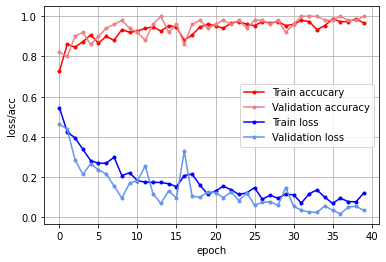

In [21]:
x_len = np.arange(len(y_vloss))
plt.plot(x_len, acc, marker=".", c="red", label="Train accucary")
plt.plot(x_len, val_acc, marker=".", c="lightcoral", label="Validation accuracy")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Train loss")
plt.plot(x_len, y_vloss, marker=".", c="cornflowerblue", label="Validation loss")

plt.grid()
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("loss/acc")
plt.show()

## 이미 학습된 가중치 이용해서 학습

- ImageNet: 1000가지 종류로 나뉜 1백 20만 개가 넘는 사진을 두고 어떤 물체인지를 맞히는 이미지넷 이미지 인식 대회(ILSVRC)에 사용되는 dataset, 200GB에 이름.
- VGGNet: 연구팀 VGG에 의해 개발된 모델, ILSVRC 2014에서 2위

In [31]:
np.random.seed(3)
tf.random.set_seed(3)

### model

In [32]:
transfer_model = VGG16(weights="imagenet", input_shape=(150, 150, 3),
    include_top=False)           # 마지막 layer, 분류기를 가져올 것인가
transfer_model.trainable = False # 앞선 층은 가중치를 update하지 않을 것임.
transfer_model.summary()         # Trainable params: 0 확인

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [33]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation="relu"))
finetune_model.add(Dense(2, activation="softmax"))

In [34]:
finetune_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [35]:
finetune_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.0002), metrics=["accuracy"])

In [36]:
history = finetune_model.fit_generator(
    train_generator, validation_data=test_generator, validation_steps=10,
    epochs=40, steps_per_epoch=30)

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - ETA: 0s - loss: 0.6315 - accuracy: 0.6200WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001DCA61359D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

### result

In [37]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
y_loss = history.history["loss"]
y_vloss = history.history["val_loss"]

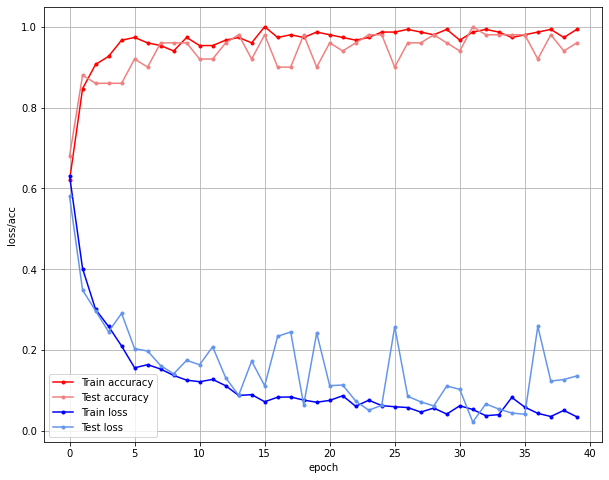

In [40]:
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10, 8))

plt.plot(x_len, acc, marker=".", c="red", label="Train accuracy")
plt.plot(x_len, val_acc, marker=".", c="lightcoral", label="Test accuracy")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Train loss")
plt.plot(x_len, y_vloss, marker=".", c="cornflowerblue", label="Test loss")

plt.grid()
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("loss/acc")
plt.show()